In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import re
from plotnine import *

In [3]:
%pwd

'C:\\Users\\suyeon\\apt_bun'

In [4]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 4075-A7F9

 C:\Users\suyeon\apt_bun 디렉터리

2019-04-08  오후 09:31    <DIR>          .
2019-04-08  오후 09:31    <DIR>          ..
2019-04-08  오후 08:50    <DIR>          .ipynb_checkpoints
2019-04-08  오후 09:12    <DIR>          data
2019-04-08  오후 09:31            30,483 아파트분양가 분석 1.ipynb
               1개 파일              30,483 바이트
               4개 디렉터리  427,494,641,664 바이트 남음


In [5]:
%matplotlib inline

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [7]:
mpl.rcParams['axes.unicode_minus']=False

In [8]:
import numpy as np
data = np.random.randint(-100,100,50).cumsum()
data

array([  49,  106,  174,  217,  290,  339,  424,  504,  425,  415,  392,
        392,  328,  411,  464,  420,  456,  448,  377,  337,  376,  333,
        354,  372,  390,  438,  366,  404,  460,  360,  317,  368,  347,
        296,  219,  175,  147,   94,   94,  103,    8,  -47,  -35,  -56,
         -5,  -75, -121, -128, -170, -209], dtype=int32)

Text(0.5, 0, '시간(분)')

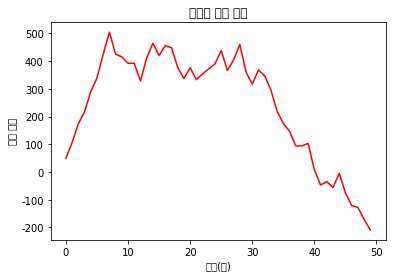

In [9]:
plt.plot(range(50),data,'r')
mpl.rcParams['axes.unicode_minus']=False
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

In [10]:
print('버전',mpl.__version__)
print('설치 위치',mpl.__file__)
print('설정 위치',mpl.get_configdir())
print('캐시 위치',mpl.get_cachedir())

버전 3.0.2
설치 위치 C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치 C:\Users\suyeon\.matplotlib
캐시 위치 C:\Users\suyeon\.matplotlib


In [11]:
print('설정파일 위치: ',mpl.matplotlib_fname())

설정파일 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [12]:
font_list = fm.findSystemFonts(fontpaths=None,fontext='ttf')

In [13]:
print(len(font_list))

663


In [14]:
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

0


In [15]:
font_list[:10]

['C:\\Windows\\Fonts\\seguibli.ttf',
 'C:\\WINDOWS\\Fonts\\H2PORL.TTF',
 'C:\\WINDOWS\\Fonts\\TCCB____.TTF',
 'C:\\Windows\\Fonts\\consolai.ttf',
 'C:\\Windows\\Fonts\\GILLUBCD.TTF',
 'C:\\Windows\\Fonts\\BERNHC.TTF',
 'C:\\Windows\\Fonts\\BRUSHSCI.TTF',
 'C:\\WINDOWS\\Fonts\\LeelUIsl.ttf',
 'C:\\Windows\\Fonts\\palabi.ttf',
 'C:\\WINDOWS\\Fonts\\ONYX.TTF']

In [16]:
f = [f.name for f in fm.fontManager.ttflist]
[(f.name,f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

In [18]:
pre_sale = pd.read_csv('data/korea_201807.csv',encoding='euc-kr')

In [19]:
pre_sale.shape

(2890, 5)

In [20]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [22]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [24]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [25]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [26]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

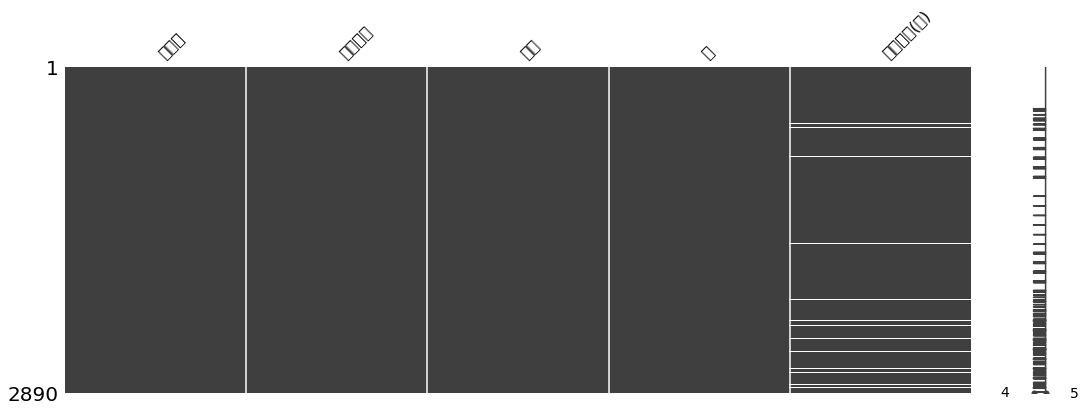

In [27]:
#결측치 보기
import missingno as msno
msno.matrix(pre_sale,figsize = (18,6))

In [28]:
pre_sale['연도'] = pre_sale['연도'].astype(str)

In [31]:
pre_sale['월'] = pre_sale['월'].astype(str)


In [32]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [33]:
#분양 가격은 str이지만 숫자형으로 cating
pre_sale['분양가격']=pd.to_numeric(pre_sale_price,errors='coerce')
pre_sale['평당분양가격']=pre_sale['분양가격']*3.3

In [34]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
분양가격       2658 non-null float64
평당분양가격     2658 non-null float64
dtypes: float64(2), object(5)
memory usage: 158.1+ KB


In [35]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [36]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [37]:
pre_sale.describe()

,분양가격,평당분양가격
count,2658.000000,2658.000000
mean,3063.297216,10108.880813
std,1112.743769,3672.054436
min,1868.000000,6164.400000
25%,2348.000000,7748.400000
50%,2743.000000,9051.900000
75%,3293.750000,10869.375000
max,8098.000000,26723.400000


In [38]:
pre_sale.describe(include='all')

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
count,2890,2890,2890,2890,2750,2658.000000,2658.000000
unique,17,5,4,12,1305,NaN,NaN
top,전남,전용면적 60㎡초과 85㎡이하,2017,1,2221,NaN,NaN
freq,170,578,1020,255,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3063.297216,10108.880813
std,NaN,NaN,NaN,NaN,NaN,1112.743769,3672.054436
min,NaN,NaN,NaN,NaN,NaN,1868.000000,6164.400000
25%,NaN,NaN,NaN,NaN,NaN,2348.000000,7748.400000
50%,NaN,NaN,NaN,NaN,NaN,2743.000000,9051.900000
75%,NaN,NaN,NaN,NaN,NaN,3293.750000,10869.375000


In [40]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,전남,전용면적 60㎡초과 85㎡이하,2017,1,2221
freq,170,578,1020,255,17


In [41]:
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']

In [42]:
pre_sale['규모구분'].value_counts()

전용면적 60㎡초과 85㎡이하     578
전용면적 60㎡이하           578
전용면적 102㎡초과          578
전용면적 85㎡초과 102㎡이하    578
전체                   578
Name: 규모구분, dtype: int64

In [43]:
pre_sale['지역명'].value_counts()

전남    170
경남    170
충남    170
충북    170
강원    170
경기    170
울산    170
세종    170
광주    170
인천    170
제주    170
부산    170
경북    170
서울    170
전북    170
대구    170
대전    170
Name: 지역명, dtype: int64

In [45]:
pd.options.display.float_format = '{:.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T # T = Transpose

연도            2015  2016  2017  2018
분양가격   count   243   984   899   532
       mean   2789  2934  3140  3299
       std     977  1071  1108  1196
       min    1868  1900  1976  2076
       25%    2225  2282  2365  2471
       50%    2516  2672  2849  2914
       75%    3026  3148  3456  3647
       max    7092  8096  7887  8098
평당분양가격 count   243   984   899   532
       mean   9203  9683 10360 10885
       std    3224  3536  3655  3947
       min    6164  6270  6521  6851
       25%    7342  7531  7804  8154
       50%    8303  8818  9402  9616
       75%    9984 10390 11405 12036
       max   23404 26717 26027 26723

In [46]:
pre_sale.pivot_table?

In [47]:
pre_sale.pivot_table('평당분양가격','규모구분','연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,9837,10389,11334,11235
전용면적 60㎡이하,8952,9399,10246,10912
전용면적 60㎡초과 85㎡이하,8892,9296,9825,10464
전용면적 85㎡초과 102㎡이하,9519,10122,10540,11483
전체,8893,9293,9901,10563


In [49]:
region_year_all = pre_sale.loc[pre_sale['규모구분']=='전체']
region_year = region_year_all.pivot_table ('평당분양가격','지역명','연도').reset_index() # 인덱스 다시 잡기
region_year

연도,지역명,2015,2016,2017,2018
0,강원,7160,7011,7127,7641
1,경기,10377,11220,11850,12881
2,경남,7586,7848,8120,8894
3,경북,7171,7361,7795,8342
4,광주,8052,8899,9464,9638
5,대구,9232,10310,11456,11737
6,대전,8098,8502,9045,9604
7,부산,10307,10430,11578,12756
8,서울,19725,20663,21376,22329
9,세종,8750,8860,9135,10375


In [51]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print('2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_delta_price))
print('하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 5,087,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 369,000원이다.
하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
전국 평균 변동액은 평당 1,669,588원이다.


연도,지역명,2015,2016,2017,2018,변동액
0,강원,7160,7011,7127,7641,481
1,경기,10377,11220,11850,12881,2503
2,경남,7586,7848,8120,8894,1308
3,경북,7171,7361,7795,8342,1171
4,광주,8052,8899,9464,9638,1585
5,대구,9232,10310,11456,11737,2504
6,대전,8098,8502,9045,9604,1506
7,부산,10307,10430,11578,12756,2449
8,서울,19725,20663,21376,22329,2603
9,세종,8750,8860,9135,10375,1624
